# Homework 2: Interstellar Medium
### Name: Males-Araujo Yorlan

The homework should be submitted as a python notebook. Please email the homework to hdenes@yachaytech.edu.ec by the <b>end of the day (midnight) by the $18$th of November.</b>

## (a) Comparing dust maps to atomic hydrogen column density

The aim of this problem is to compare the interstellar dust extinction to the neutral hydrogen column density of the same region in the sky.

### High latitude region

#### 1. Make a map of dust extinction ($A_v$) using the `dustmaps` package for the following region: R.A: $73.0^{\circ}$ and Dec: $3.0^{\circ}$. Select the region so that it has a width of $10^{\circ}$ $\times$ $10^{\circ}$. Use data from the "Bayestar" dust map (Green et al. $2019$, [DOI](https://doi.org/10.3847/1538-4357/ab5362)).

In [1]:
# Libraries
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pandas as pd

# Astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
from astropy.wcs import WCS

# Dustmaps
from dustmaps.bayestar import BayestarQuery
from dustmaps.sfd import SFDQuery

In [2]:
# I used colab to read the data, so I had to do this mounting thing
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Read the files locally
# from dustmaps.config import config
# config['data_dir'] = '/content/drive/MyDrive/dust_maps/'

In [4]:
# Define the coordinates in degrees
ra_0, dec_0 = 73.0, 3.0

In [5]:
# Select the region with width of 10 degrees
ra_1d = np.arange(ra_0 - 5, ra_0 + 5., 0.01)
dec_1d = np.arange(dec_0 - 5, dec_0 + 5, 0.01)

In [6]:
# Create the mesh and get the coordinates
ra_2d, dec_2d = np.meshgrid(ra_1d, dec_1d)
coords = SkyCoord(ra_2d*u.deg, dec_2d*u.deg, distance = 1*u.kpc, frame='icrs')

In [7]:
# Then
# bayestar = BayestarQuery(max_samples = 1, version = 'bayestar2019')

# And extract the data based on the coordinates
# av_bayestar_hl_2d = 2.742 * bayestar(coords)

The cell above returned:
```
Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 39.466 s
  pix_info:   2.179 s
   samples:  16.398 s
      best:   5.167 s
       nan:   0.032 s
      sort:  15.512 s
       idx:   0.179 s
```
It's commented because my computer crashed a couple of times when trying to load the data. As stated above, I used `colab` to read it, and later saved the files as csv's to work in `jupyter lab` without internet. These files were also sent.

In [8]:
# Read the csv
av_bayestar_hl_2d = np.array(pd.read_csv('./Data/dust_extintion_highlat.csv'))

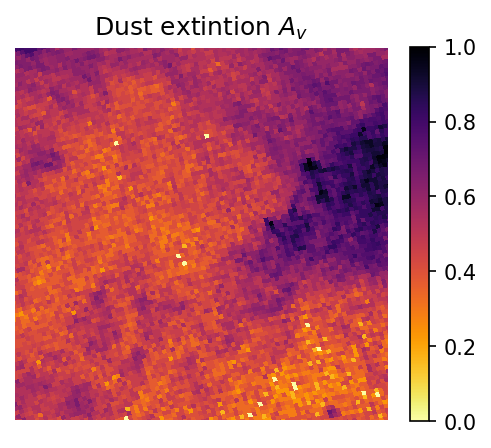

In [9]:
# Plot!
plt.figure(figsize = (4,4),dpi = 150)
plot = plt.imshow(np.sqrt(av_bayestar_hl_2d)[:,::-1], vmin = 0, vmax = 1,
                  origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                  aspect = 'equal')

plt.colorbar(plot, shrink = 0.81)

plt.title('Dust extintion $A_v$')

plt.axis('off')
plt.show()
plt.close()

#### 2. Use the `SkyCoord` package to convert R.A and Dec to galactic longitude and latitude.

In [10]:
# Simply
g_coords = SkyCoord(ra_2d*u.deg, dec_2d*u.deg, distance = 1*u.kpc, frame = 'galactic')

#### 3. Get the neutral atomic hydrogen column density $\rm N(HI)$ map for the same region of the sky. For this you can use the `astroquery` package and select the `HI4PI` survey. Make sure to select the same region with the same pixel size.

In [11]:
# Define the coordinates for the same region
coords_2 = SkyCoord(ra = 73*u.degree, dec = 3*u.degree, frame='icrs')

In [12]:
# Extract the data
# region = SkyView.get_images(position = coords_2, width = 10*u.deg, height = 10*u.deg,
#                              survey = ['HI4PI'], pixels = [av_bayestar_hl_2d.shape[0], av_bayestar_hl_2d.shape[1]])

In [13]:
# Then
# hdulist_HI = region[0]

# Data and header
# data_hi_hl_2d = hdulist_HI[0].data
# header_hi = hdulist_HI[0].header

I also saved this image to be able to work without internet.

In [14]:
# Read the csv
data_hi_hl_2d = np.array(pd.read_csv('./Data/column_dens_highlat.csv'))

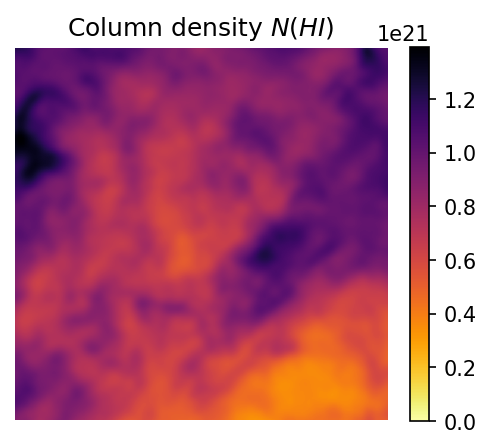

In [15]:
# Plot!
plt.figure(figsize = (4,4), dpi = 150)
plot = plt.imshow(data_hi_hl_2d, vmin = 0,
                  origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                  aspect = 'equal')

plt.colorbar(plot, shrink = 0.81)

plt.title('Column density $N(HI)$')

plt.axis('off')
plt.show()
plt.close()

Let's plot both together!

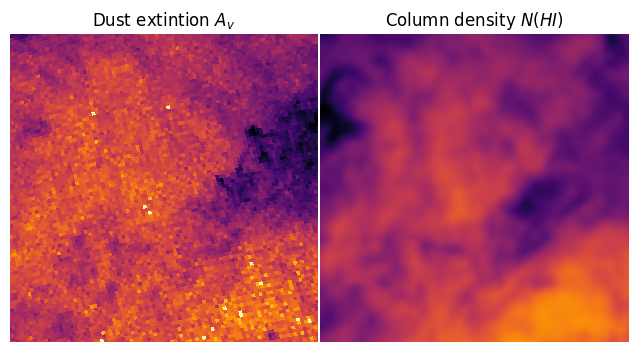

In [16]:
# Both together
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

# First axis
plot = ax[0].imshow(np.sqrt(av_bayestar_hl_2d)[:,::-1], vmin = 0, vmax = 1,
                    origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                    aspect = 'equal')
ax[0].set_title('Dust extintion $A_v$')
ax[0].axis('off')

# Second axis
plot = ax[1].imshow(data_hi_hl_2d, vmin = 0,
                    origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                    aspect = 'equal')
ax[1].set_title('Column density $N(HI)$')
ax[1].axis('off')

fig.subplots_adjust(wspace = 0, hspace = 0)

#### 4. Make an overlay of the two data sets. Plot $\rm N(HI)$ as the contours.

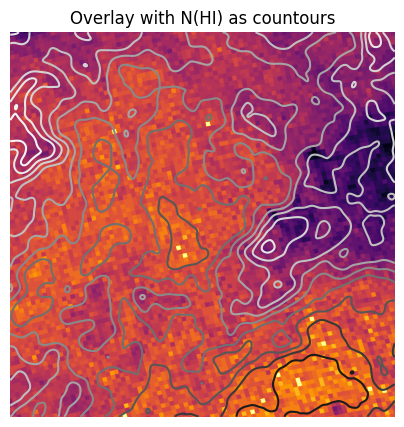

In [17]:
# Plot
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(np.sqrt(av_bayestar_hl_2d)[:, ::-1], cmap='inferno_r')
ax.invert_yaxis()
contour = ax.contour(data_hi_hl_2d, levels=10, cmap='Greys_r')
plt.axis('off')
plt.title('Overlay with N(HI) as countours')
plt.xlabel('RA [°]')
plt.show()
plt.close()

#### 5. Make histograms of $A_v$ and $\rm N(HI)$. Compare the two distributions. What do you notice about them?

In [18]:
# Let's flatten the images
av_bayestar_hl_1d = av_bayestar_hl_2d[:,::-1].flatten()
data_hi_hl_1d = data_hi_hl_2d.flatten()

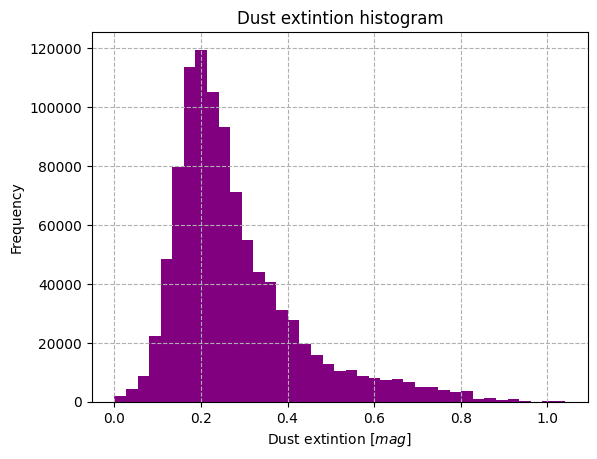

In [19]:
# Histogram
plt.figure()
plt.grid(ls = '--')
plt.hist(av_bayestar_hl_1d, bins = 39, color = 'purple')
plt.title('Dust extintion histogram')
plt.xlabel('Dust extintion [$mag$]')
plt.ylabel('Frequency')
plt.show()
plt.close()

Observations: This one has $1$ peak only, and is clearly lognormal.

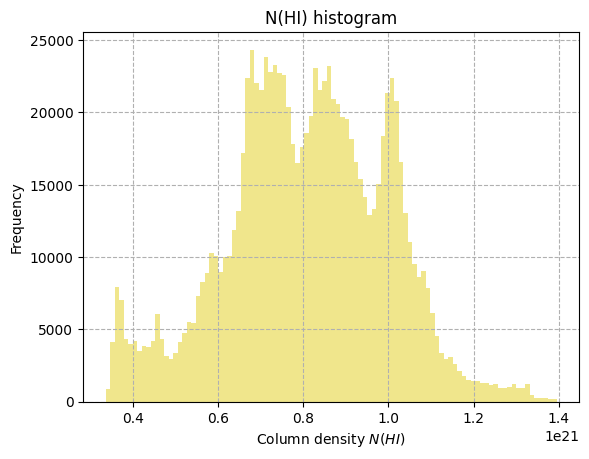

In [20]:
# Histogram
plt.figure()
plt.grid(ls = '--')
plt.hist(data_hi_hl_1d, bins = 100, color = 'khaki')
plt.title('N(HI) histogram')
plt.xlabel('Column density $N(HI)$')
plt.ylabel('Frequency')
plt.show()
plt.close()

Observations: In contrast, this one has many peaks, and would be better described as normal than lognormal. They are not alike. 

#### 6. Make a plot of $A_v$ vs. $\rm N(HI)$ and fit a linear relation to the data. How does the fit compare to the relation found in Güver and Özel $\rm 2009$ (check [here](https://doi.org/10.1111/j.1365-2966.2009.15598.x)): $\rm N(HI)$ = $A_v \times 2.2 \times 10^{21}$?

##### Simple plot

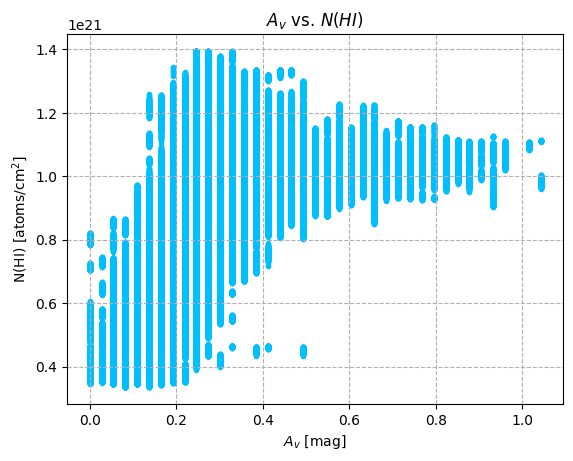

In [21]:
# Plot
plt.figure()
plt.scatter(av_bayestar_hl_1d, data_hi_hl_1d, marker = '.', color = 'deepskyblue')

plt.title(r'$A_v$ vs. $N(HI)$')
plt.xlabel('$A_v$ [mag]')
plt.ylabel(r'N(HI) [atoms/cm$^2$]')

plt.grid(ls = '--')
plt.show()
plt.close()

##### Regression

In [22]:
# Let's define the linear model
def linear_model(x_array, a, b):
    """
    Linear model.

    Parameters
    ----------
    x_array : array, float, required
        Range in x.
    a, b : float, required
        Real constants that define the model.

    Returns
    -------
    y_array : array, float
        Evaluated points.
    """
    # Simply
    y_array = a*x_array + b

    return y_array

In [23]:
# Let's define a function to normalize arrays
def normalize(x_array):
    """
    Normalizes an array.

    Parameters
    ----------
    x_array : array, float, required
        Array to be scaled.

    Returns
    -------
    x_norm_array : array, float
        Normalized array.
    """
    # Get the min and max values
    x_min = np.nanmin(x_array)
    x_max = np.nanmax(x_array)

    # Normalize the arrat
    x_norm_array = (x_array-x_min)/(x_max - x_min)

    return x_norm_array

---
To get the coefficients of the original data, we have to perform these two operations:
$$
m = m_{\rm norm}\left(\frac{y_{\rm max}-y_{\rm min}}{x_{\rm max}-x_{\rm min}}\right)
$$

$$
b = b_{\rm norm}\cdot(y_{\rm max}-y_{\rm min}) + y_{\rm min} - m\cdot x_{\rm min},
$$
where $m_{\rm norm}$ and $b_{\rm norm}$ are the ones we obtained with normalized arrays.


---

In [24]:
# To get the original coefficients, define
def get_original_coefficients(x, y, coef):
    """
    Denormalize linear parameters obtained via
    regression with normalized arrays.

    Parameters
    ----------
    x : array, float, required
        Non-normalized x array.
    y : array, float, required
        Non-normalized y array.
    coef : list, float, required
        Two-element list with the estimated
        parameters through normalized data, [a, b].

    Returns
    -------
    slope : float
        Slope of the original data.
    intercept : float
        Intercept of the origina data.
    """
    # Get the slope
    slope = coef[0]*(np.max(y) - np.min(y))/(np.max(x) - np.min(x))

    # And intercept
    intercept = coef[1]*(np.max(y) - np.min(y)) + np.min(y) - slope*np.min(x)

    return slope, intercept

In [25]:
# Normalize each array
av_norm_array = normalize(av_bayestar_hl_1d)
hi_norm_array = normalize(data_hi_hl_1d)

In [26]:
# Find the coefficients via regression
coefficients, _ = opt.curve_fit(linear_model, av_norm_array, hi_norm_array)

In [27]:
# Get the original parameters
slope, intercept = get_original_coefficients(x = av_bayestar_hl_2d, y = data_hi_hl_2d, coef = coefficients)

In [28]:
# Create a clean array
x_array = np.linspace(0, 1, 1000)

# And fit the model
fit_array = linear_model(x_array, slope, intercept)

##### Comparison

In [29]:
# Get the relation found by Güver and Özel
guver_ozer_array = linear_model(x_array, a = 2.2e21, b = 0)

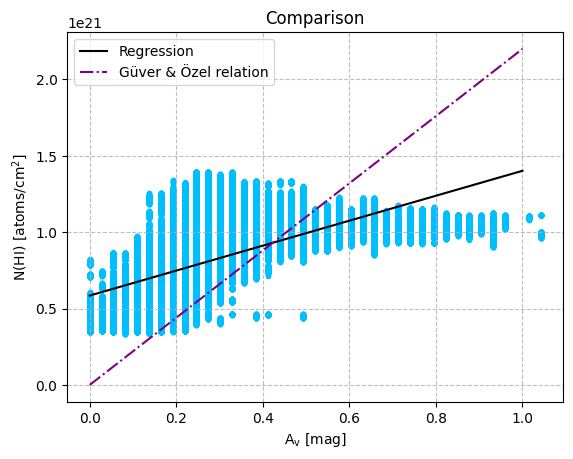

In [30]:
# Plot
plt.figure()
plt.scatter(av_bayestar_hl_1d, data_hi_hl_1d, marker = '.',
            color = 'deepskyblue')

plt.plot(x_array, fit_array, color = 'k', label = 'Regression')
plt.plot(x_array, guver_ozer_array, color = 'purple',
         ls = '-.', label = 'Güver & Özel relation')

plt.title('Comparison')
plt.xlabel(r'$\rm A_v$ [$\rm mag$]')
plt.ylabel(r'N(HI) [atoms/cm$^2$]')
plt.legend(loc = 2)
plt.grid(ls = '--', alpha = 0.8)

plt.show()
plt.close()

Clearly, the relations are not the same.

#### 7. What do you think is the reason for the differences between your fit and the results of Güver and Özel $2009$?

There could be some reasons. 

- The data we're using is different, which might be the principal cause of discrepancies.

- Güver and Özel relation is intended to fit large-scale trends (more general), while our data is small-scale.

- They assumed $R_v = 3.1$, while we used $R_v = 2.742$ for conversion.

### Disk region

#### 8. Make a map of dust extinction ($A_v$) using `dustmaps` for a region close to the disk of the Galaxy: RA: $287.0^{\circ}$, Dec: $3.0^{\circ}$.

In [31]:
# Define the coordinates in degrees
ra_1, dec_1 = 287.0, 3.0

In [32]:
# Select the region with width of 10 degrees
ra_1d_2 = np.arange(ra_1 - 5, ra_1 + 5, 0.04)
dec_1d_2 = np.arange(dec_1 - 5, dec_1 + 5, 0.04)

In [33]:
# Create the mesh and get the coordinates
ra_2d_2, dec_2d_2 = np.meshgrid(ra_1d_2, dec_1d_2)
coords_2 = SkyCoord(ra_2d_2*u.deg, dec_2d_2*u.deg, distance = 1*u.kpc, frame='icrs')

In [34]:
# Extract the data
# av_bayestar_disk_2d = 2.742 * bayestar(coords_2)

In [35]:
# Read the csv
av_bayestar_disk_2d = np.array(pd.read_csv('./Data/dust_extintion_disk.csv'))

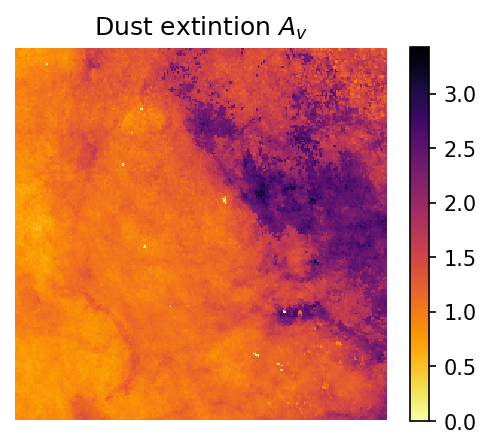

In [36]:
# Plot!
plt.figure(figsize = (4,4),dpi = 150)
plot = plt.imshow(np.sqrt(av_bayestar_disk_2d)[:,::-1],
                  origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                  aspect = 'equal')

plt.colorbar(plot, shrink = 0.81)

plt.title('Dust extintion $A_v$')

plt.axis('off')
plt.show()
plt.close()

#### 9. Use `SkyCoord` to convert R.A and Dec to galactic longitude and latitude.

In [37]:
# As done above
g_coords_2 = SkyCoord(ra_2d_2*u.deg, dec_2d_2*u.deg, distance = 1*u.kpc, frame = 'galactic')

#### 10. Get the neutral atomic hydrogen column density $\rm N(HI)$ map for the same region of the sky. For this you can use `astroquery` and select the `HI4PI` survey. Make sure to select the same region with the same pixel size.

In [38]:
# Define the coordinates for the same region
coords_3 = SkyCoord(ra = 287*u.degree, dec = 3*u.degree, frame='icrs')

In [39]:
# Extract the data
# region_disk = SkyView.get_images(position = coords_3, width = 10*u.deg,
#                                  height = 10*u.deg, survey = ['HI4PI'],
#                                  pixels = [av_bayestar_disk_2d.shape[0], av_bayestar_disk_2d.shape[1]])

In [40]:
# Then
# hdulist_HI_2 = region_disk[0]

# Data and header
# data_hi_disk_2d = hdulist_HI_2[0].data
# header_hi_2 = hdulist_HI_2[0].header

In [41]:
# Read the csv
data_hi_disk_2d = np.array(pd.read_csv('./Data/column_dens_disk.csv'))

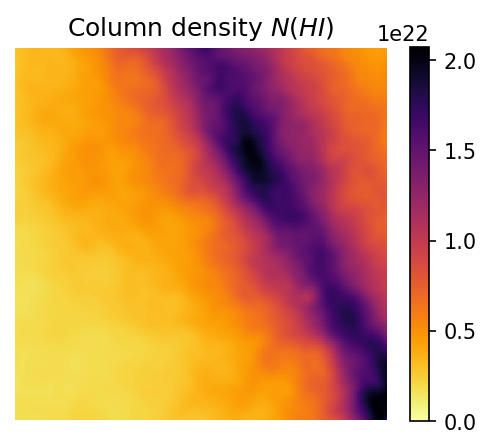

In [42]:
# Plot!
plt.figure(figsize = (4,4),dpi = 150)
plot = plt.imshow(data_hi_disk_2d, vmin = 0,
                  origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                  aspect = 'equal')

plt.colorbar(plot, shrink = 0.81)

plt.title('Column density $N(HI)$')

plt.axis('off')
plt.show()
plt.close()

And one next to the other for comparison.

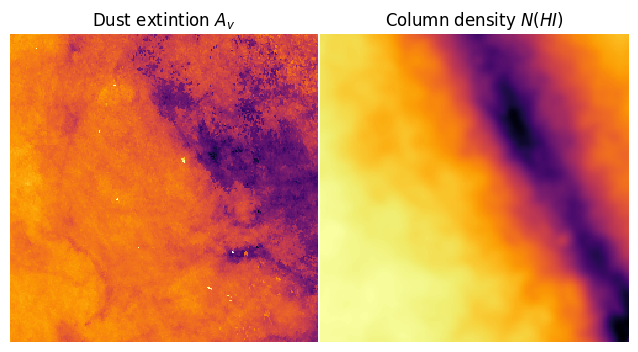

In [43]:
# Both together
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

# First axis
plot = ax[0].imshow(np.sqrt(av_bayestar_disk_2d)[:,::-1],
                    origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                    aspect = 'equal')
ax[0].set_title('Dust extintion $A_v$')
ax[0].axis('off')

# Second axis
plot = ax[1].imshow(data_hi_disk_2d,
                    origin = 'lower', interpolation = 'nearest', cmap = 'inferno_r',
                    aspect = 'equal')
ax[1].set_title('Column density $N(HI)$')
ax[1].axis('off')

fig.subplots_adjust(wspace = 0, hspace = 0)

#### 11. Make an overlay of the two data sets. Plot $\rm N(HI)$ as the contours.

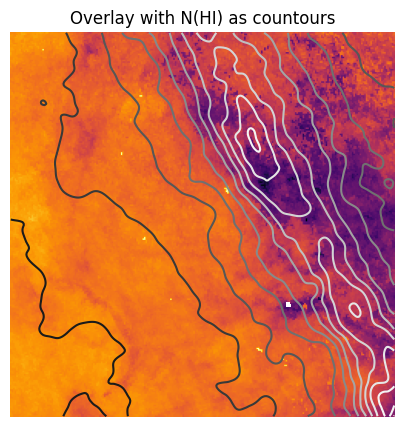

In [44]:
# Plot
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(np.sqrt(av_bayestar_disk_2d)[:, ::-1], cmap='inferno_r')
ax.invert_yaxis()
contour = ax.contour(data_hi_disk_2d, levels=10, cmap='Greys_r')
plt.axis('off')
plt.title('Overlay with N(HI) as countours')
plt.xlabel('RA [°]')
plt.show()
plt.close()

#### 12. Make a plot of $A_v$ vs. $\rm N(HI)$. Fit a linear relation to the data. How does the fit compare to the relation found in Güver and Özel $2009$: $\rm N(HI)$ $= A_v \times 2.2 \times 10^{21}$?

##### Simple plot

In [45]:
# Flatten each
av_bayestar_disk_1d = av_bayestar_disk_2d[:, ::-1].flatten()
data_hi_disk_1d = data_hi_disk_2d.flatten()

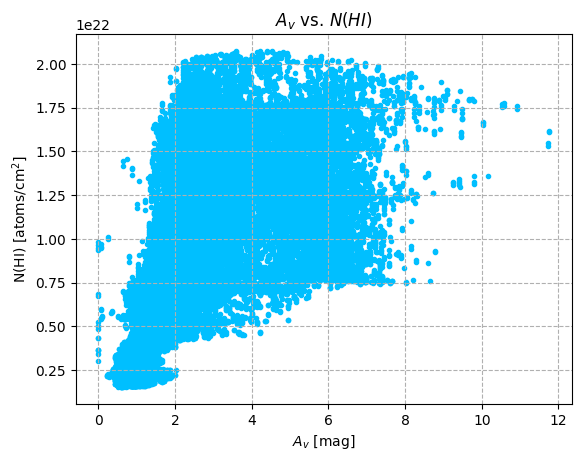

In [46]:
# Plot
plt.figure()
plt.scatter(av_bayestar_disk_1d, data_hi_disk_1d, marker = '.', color = 'deepskyblue')

plt.title(r'$A_v$ vs. $N(HI)$')
plt.xlabel('$A_v$ [mag]')
plt.ylabel(r'N(HI) [atoms/cm$^2$]')

plt.grid(ls = '--')
plt.show()
plt.close()

##### Regression

In [47]:
# Remove the NaN values
new_av_bayestar_disk_1d = np.where(np.isnan(av_bayestar_disk_1d) == 1, 0, av_bayestar_disk_1d)

In [48]:
# Normalize each array
av_norm_array_2 = normalize(new_av_bayestar_disk_1d)
hi_norm_array_2 = normalize(data_hi_disk_1d)

In [49]:
# Find the coefficients
coefficients_2, _ = opt.curve_fit(linear_model, av_norm_array_2, hi_norm_array_2)

##### Comparison

There were problems with the denormalization, so I present $1)$ the regression with the normalized arrays for my regression and $2)$ the one with the original arrays for Güver and Özer.

In [50]:
# Create a new array
x_array_2 = np.linspace(0, 0.8, 1000)

# And fit the model
fit_array_2 = linear_model(x_array_2, coefficients_2[0], coefficients_2[1])

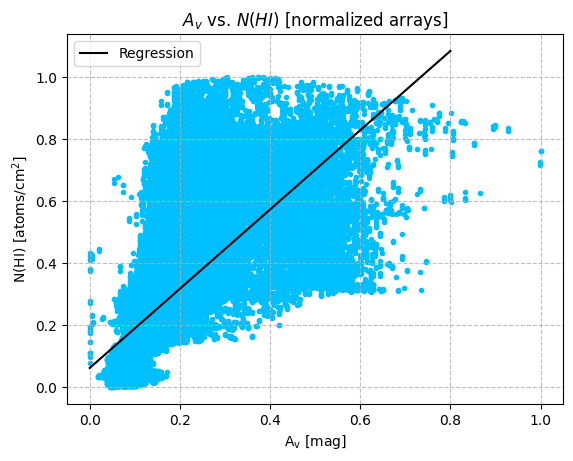

In [51]:
# Plot
plt.figure()
plt.scatter(av_norm_array_2, hi_norm_array_2, marker = '.',
            color = 'deepskyblue')

plt.plot(x_array_2, fit_array_2, color = 'k', label = 'Regression')

plt.title('$A_v$ vs. $N(HI)$ [normalized arrays]')
plt.xlabel(r'$\rm A_v$ [$\rm mag$]')
plt.ylabel(r'N(HI) [atoms/cm$^2$]')
plt.legend(loc = 2)
plt.grid(ls = '--', alpha = 0.8)

plt.show()
plt.close()

In [52]:
# Create a new array
x_array_3 = np.linspace(0, 10, 1000)

# Get the relation found by Güver and Özel
guver_ozer_array_2 = linear_model(x_array_3, a = 2.2e21, b = 0)

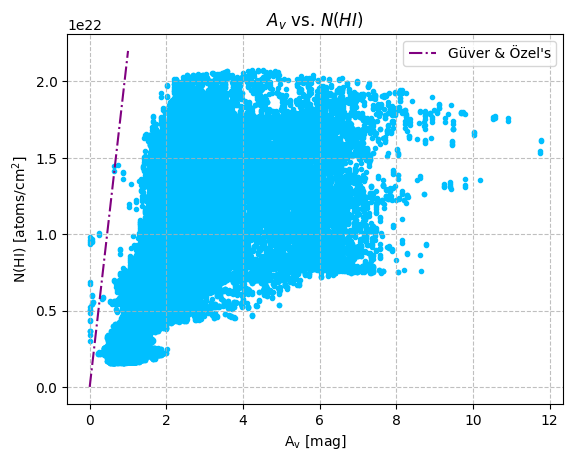

In [53]:
# Plot
plt.figure()
plt.scatter(av_bayestar_disk_1d, data_hi_disk_1d, marker = '.',
            color = 'deepskyblue')

plt.plot(x_array, guver_ozer_array_2, color = 'purple',
         ls = '-.', label = "Güver & Özel's")

plt.title('$A_v$ vs. $N(HI)$')
plt.xlabel(r'$\rm A_v$ [$\rm mag$]')
plt.ylabel(r'N(HI) [atoms/cm$^2$]')
plt.legend(loc = 1)
plt.grid(ls = '--', alpha = 0.8)

plt.show()
plt.close()

We see Güver and Özel's relation does not fit this data at all.

#### 13. Do you see any differences between the plots of the two different regions of the sky? How do the $A_v$ vs. $\rm N(HI)$ plots differ? What do you think is the reason for this?

The correlation between them is more apparent for the high latitude region than for the disk region, where there's almost no correlation. I think it might be because the disk does not contain dust in large proportions as it happens in high latitudes.

#### 14. How does the amount of dust differ in the two regions? To compare make a histogram of $A_v$ for both regions. How is the distribution of $A_v$? Is the peak of the distribution at the same $A_v$ for the two regions?

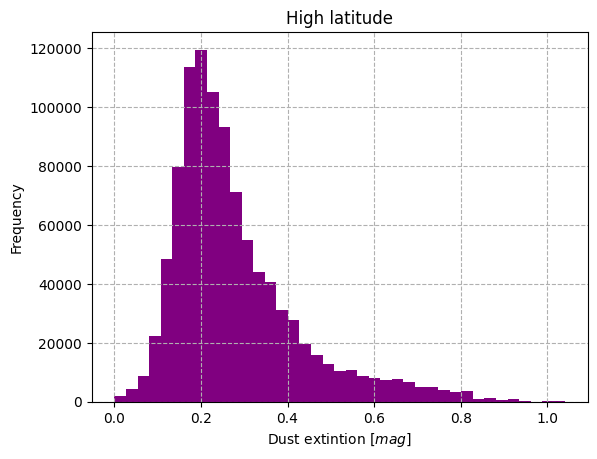

In [54]:
# Histogram
plt.figure()
plt.grid(ls = '--')
plt.hist(av_bayestar_hl_2d.flatten(), bins = 39, color = 'purple')
plt.title('High latitude')
plt.xlabel('Dust extintion [$mag$]')
plt.ylabel('Frequency')
plt.show()
plt.close()

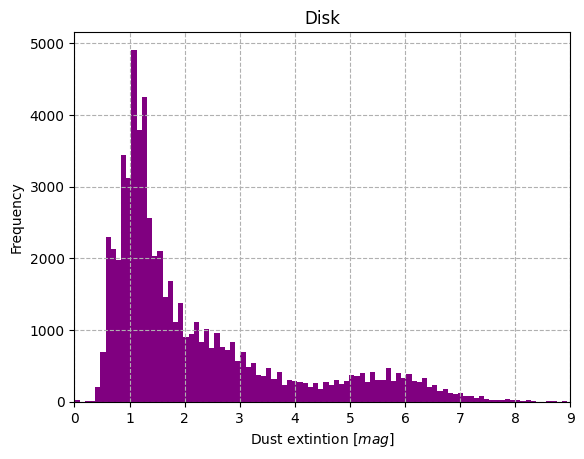

In [55]:
# Histogram
plt.figure()
plt.grid(ls = '--')
plt.hist(av_bayestar_disk_2d.flatten(), bins = 125, color = 'purple')
plt.title('Disk')
plt.xlabel('Dust extintion [$mag$]')
plt.ylabel('Frequency')
plt.xlim(0, 9)
plt.show()
plt.close()

The distributions are lognormal, although the disk region has a little bump close to its tail. Also, both peaks are close but they are not exactly the same.

#### 15. How does the amount of $\rm HI$ differ in the two regions? To compare make a histogram of $\rm N(HI)$ for both regions. How is the distribution of $\rm N(HI)$? Is the peak of the distribution at the same $\rm N(HI)$ for the two regions?

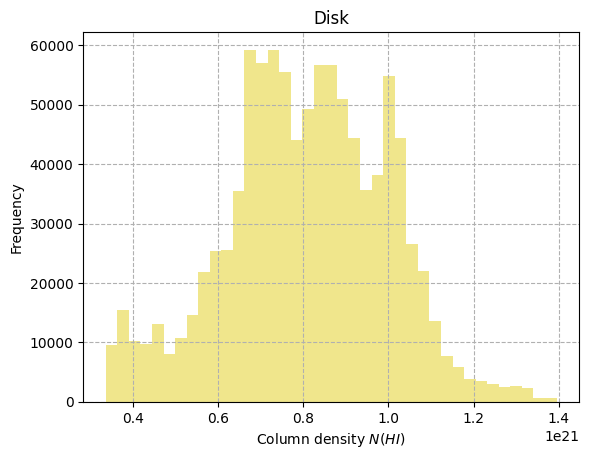

In [56]:
# Histogram
plt.figure()
plt.grid(ls = '--')
plt.hist(data_hi_hl_2d.flatten(), bins = 39, color = 'khaki')
plt.title('Disk')
plt.xlabel('Column density $N(HI)$')
plt.ylabel('Frequency')
plt.show()
plt.close()

This distribution looks to be normal and with many peaks. 

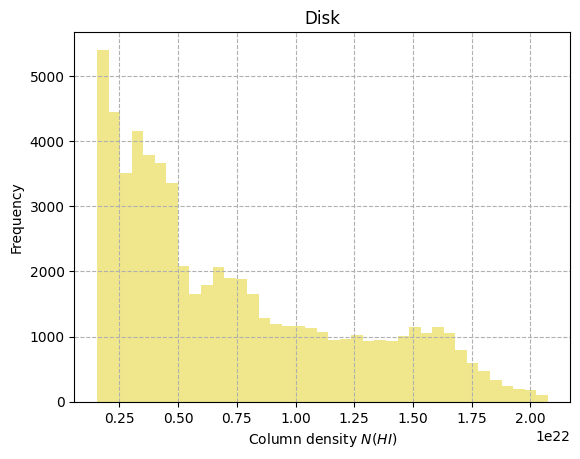

In [57]:
# Histogram
plt.figure()
plt.grid(ls = '--')
plt.hist(data_hi_disk_2d.flatten(), bins = 39, color = 'khaki')
plt.title('Disk')
plt.xlabel('Column density $N(HI)$')
plt.ylabel('Frequency')
plt.show()
plt.close()

This one is quite different! There are more small values, and it does not decay quickly. The peaks do not coincide.

## (b) Calculate the reddening for stars

#### 16. Calculate the reddening for the star Vega with R.A: $279.23473479^{\circ}$, Dec: $38.78368894^{\circ}$, apparent magnitude ($V$): $+0.026$. Assume the distance is $1 \rm kpc$.

In [58]:
# Define the coordinates
coords_4 = SkyCoord(279.23473479*u.deg, 38.78368894*u.deg, distance = 1*u.kpc, frame='icrs')

# And get the reddening
# vega_reddening = bayestar(coords_4, mode='median')

In [59]:
# I saved it as
vega_reddening = 0.014999999664723873

In [60]:
# Print it
print(f'Vega reddening: {vega_reddening:.3}.')

Vega reddening: 0.015.


#### 17. Calculate the reddening for the star Altair with Ra: $297.6958273^{\circ}$, Dec: $8.8683212^{\circ}$, apparent magnitude ($V$): $6.67$. Also assume the distance is $1 \rm kpc$.

In [61]:
# Define the coordinates
coords_5 = SkyCoord(297.6958273*u.deg, 8.8683212*u.deg, distance = 1*u.kpc, frame='icrs')

# Print it
# altair_reddening = bayestar(coords_5, mode='median')

In [62]:
# I also saved this one
altair_reddening = 0.029999997466802597

In [63]:
# Print it
print(f'Altair reddening:  {altair_reddening:.3}')

Altair reddening:  0.03


#### 18. How does the reddening differ between the two?

The reddening of Altair is **twice** Vega's. This indicates Altair it is more affected by interestellar dust than Vega.

#### 19. Calculate the reddening corrected absolute magnitude of Vega.

In [64]:
# Define
M = lambda m, d, a_v: m - 5*(np.log10(d)-1) - a_v

In [65]:
# Call it using the real distance in pc
abs_mag_vega = M(0.026, 7.68, vega_reddening)

# Print
print(f'The reddening corrected absolute magnitude of Vega is {abs_mag_vega:.2} mag.')

The reddening corrected absolute magnitude of Vega is 0.58 mag.


#### 20. Calculate the reddening corrected absolute magnitude of Rigel.

In [66]:
# Call again using the real distance
abs_mag_vega = M(6.67, 5.13, altair_reddening)

# Print
print(f'The reddening corrected absolute magnitude of Vega is {abs_mag_vega:.2} mag.')

The reddening corrected absolute magnitude of Vega is 8.1 mag.


That's it :).